# Iris Data Wrangling & Exploration 
The purpose of this notebook is to adequately understand, describe, and explore the iris data set that will be used in this project.

In [2]:
import os
while os.path.basename(os.getcwd()) != 'Synthetic_Data_GAN_Capstone':
    os.chdir('..')
from utils.data_loading import load_raw_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing data
Note that I have written a helper function to load in the desired data set. If you have not already downloaded
the data sets to the appropriate directory, this can be done simply by running the following code:

In [2]:
iris = load_raw_dataset('iris')
iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Inspecting the data

In [3]:
print(iris.shape)
iris.describe()

(150, 5)


,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We have a total of 4 features, along with a class label. There is no missing data present.

In [4]:
iris.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

There are three species, and 50 of each label. This is a balanced classification problem. We have a
disappointingly low number of observations, however. Hopefully we can generate some meaningful new observations!

### Visualizing the data

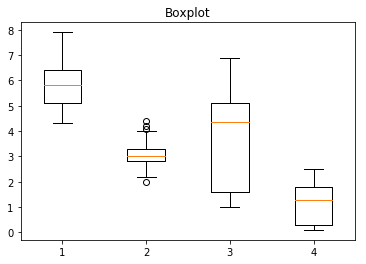

In [5]:
plt.boxplot([iris.sepal_len, iris.sepal_wid, iris.petal_len, iris.petal_wid])
plt.title('Boxplot')
plt.show()

The data distributions look okay via the box plot. Let's take a look at a few box plots by species.

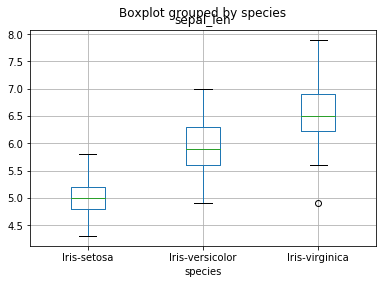

In [6]:
iris.boxplot('sepal_len','species')
plt.show()

In [7]:
iris.boxplot('sepal_wid','species')
plt.show()

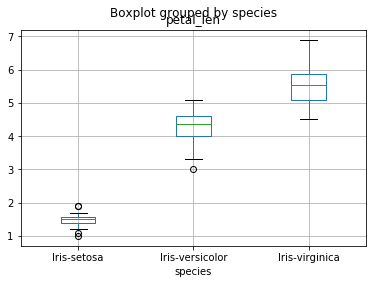

In [8]:
iris.boxplot('petal_len','species')
plt.show()

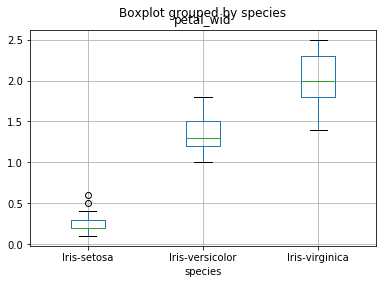

In [9]:
iris.boxplot('petal_wid','species')
plt.show()

There is a very clear pattern here by our features. Let's take a look at some histograms/density plots.

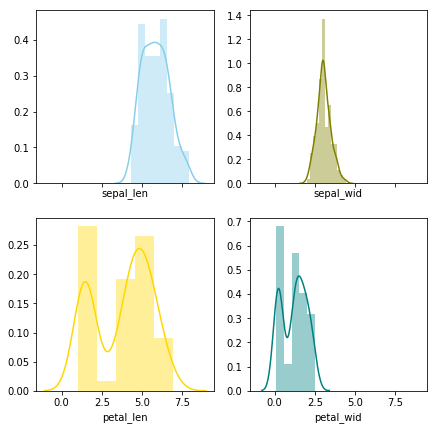

In [10]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot( iris["sepal_len"] , color="skyblue", ax=axes[0, 0])
sns.distplot( iris["sepal_wid"] , color="olive", ax=axes[0, 1])
sns.distplot( iris["petal_len"] , color="gold", ax=axes[1, 0])
sns.distplot( iris["petal_wid"] , color="teal", ax=axes[1, 1])

It appears we have a some multimodal distributions present. This could be due to difference in species!

In [66]:
f, axes = plt.subplots(3, 4, figsize=(15, 15), sharex=True)
sns.distplot(iris['sepal_len'][iris.species=='Iris-setosa'], color='red', ax=axes[0,0])
sns.distplot(iris['sepal_len'][iris.species=='Iris-versicolor'], color='blue', ax=axes[1,0])
sns.distplot(iris['sepal_len'][iris.species=='Iris-virginica'], color='green', ax=axes[2,0])
sns.distplot(iris['sepal_wid'][iris.species=='Iris-setosa'], color='red', ax=axes[0,1])
sns.distplot(iris['sepal_wid'][iris.species=='Iris-versicolor'], color='blue', ax=axes[1,1])
sns.distplot(iris['sepal_wid'][iris.species=='Iris-virginica'], color='green', ax=axes[2,1])
sns.distplot(iris['petal_len'][iris.species=='Iris-setosa'], color='red', ax=axes[0,2])
sns.distplot(iris['petal_len'][iris.species=='Iris-versicolor'], color='blue', ax=axes[1,2])
sns.distplot(iris['petal_len'][iris.species=='Iris-virginica'], color='green', ax=axes[2,2])
sns.distplot(iris['petal_wid'][iris.species=='Iris-setosa'], color='red', ax=axes[0,3])
sns.distplot(iris['petal_wid'][iris.species=='Iris-versicolor'], color='blue', ax=axes[1,3])
sns.distplot(iris['petal_wid'][iris.species=='Iris-virginica'], color='green', ax=axes[2,3])

We will return here later to look at whether the distributions generated by our GAN matches these conditional
distributions! Now onto some scatter plots.

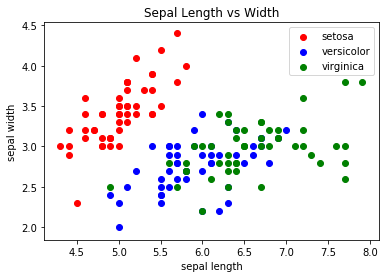

In [11]:
plt.scatter(iris.sepal_len[iris.species=='Iris-setosa'], iris.sepal_wid[iris.species=='Iris-setosa'], c='r', label='setosa')
plt.scatter(iris.sepal_len[iris.species=='Iris-versicolor'], iris.sepal_wid[iris.species=='Iris-versicolor'], c='b', label='versicolor')
plt.scatter(iris.sepal_len[iris.species=='Iris-virginica'], iris.sepal_wid[iris.species=='Iris-virginica'], c='g', label='virginica')
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Sepal Length vs Width')
plt.show()

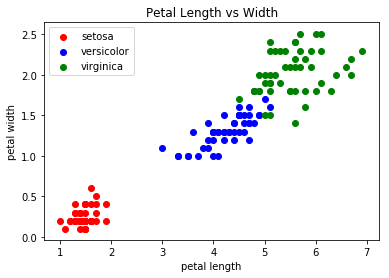

In [59]:
plt.scatter(iris.petal_len[iris.species=='Iris-setosa'], iris.petal_wid[iris.species=='Iris-setosa'], c='r', label='setosa')
plt.scatter(iris.petal_len[iris.species=='Iris-versicolor'], iris.petal_wid[iris.species=='Iris-versicolor'], c='b', label='versicolor')
plt.scatter(iris.petal_len[iris.species=='Iris-virginica'], iris.petal_wid[iris.species=='Iris-virginica'], c='g', label='virginica')
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Petal Length vs Width')
plt.show()

## Takeaways
There are clear patterns here, and this data looks like it will likely be linearly separable (or at least close to linearly separable, so classifying shouldn't be a big challenge. Since there are no missing data values, and it looks like we have plenty of great features, I think we can leave the iris data set alone and move on to a slightly more complicated data set.